In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
ROOT = os.popen("git rev-parse --show-toplevel").read().split("\n")[0]

import sys
sys.path.append(ROOT)

import src as sc
#import streamlit as st

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> python src/preprocessing.py
> python src/locations.py 
```
from the top level git directory.

In [7]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

sc.fill_buildings(student_df = student_df, hall_df = hall_df)


INFO:root:
 Filling residence halls...
INFO:root:
 Filling remaining buildings...


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> python src/learning.py <beta> <lambda> <tau> <init> <iterations>
```
from the top level git directory.  Here the values in angle brackets should be replaced by the appropriate values, where 

```
        beta: (float) beta factor determines weight of the diversity 
            objectives in the optimization (i.e. "term 1").
        lam: (float) lambda factor determines weight of artwork capacity 
            constraints in optimization (i.e. "term 2").
        tau: (float) tau factor determines weight of preference for current 
            assignment in optimization (i.e. "term 3").
        init: (int) one of the following: 
                1 - identity matrix initialization
                2 - uniform initialization
                3 - current assignment initialization
                4 - random permutation initialization
        iterations: (int) number of iterations of gradient descent
```
Output will be printed to `output` folder.

In [8]:
# Load data
hall_df, student_df, art_df = sc.load_data()


In [9]:
# Get building_capacity_df
building_capacity_df = sc.get_building_capacity_df()
building_capacity_df

capacity
aidekman                        218
anderson                          2
ballou                           32
capen_house                       1
clic                              1
dental_school                     5
eaton_hall                        1
fine_arts_house                   3
gifford_house                    24
goddard_chapel                   12
goddard_hall                      2
granoff_fam_hillel_center         1
granoff_music_bld                 5
houston_hall                      1
jean_mayer_hnra_center            1
lane_hall                         1
miner_hall                        1
packard_hall                      3
smfa                              2
sophia_gordon_hall                1
tisch_library                    51
univ_advancement                  4

In [10]:
# Get art_capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(student_df,art_df,categories = ["gender","race"])
art_capacity_df

string  capacity
(1, 1)                              Woman, White       100
(1, 2)                              Woman, Asian         4
(1, 3)              Woman, Hispanics of any race         4
(1, 4)          Woman, Black or African American         7
(1, 5)                  Woman, Two or more races         0
(1, 6)   Woman, American Indian or Alaska Native        15
(1, 7)  Woman, Nat. Hawaiian or Other Pac Island         0
(2, 1)                                Man, White       100
(2, 2)                                Man, Asian        35
(2, 3)                Man, Hispanics of any race       100
(2, 4)            Man, Black or African American        54
(2, 5)                    Man, Two or more races         1
(2, 6)     Man, American Indian or Alaska Native        19
(2, 7)    Man, Nat. Hawaiian or Other Pac Island         0

In [11]:
# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(hall_df = hall_df,
                                 student_df = student_df,
                                 art_df = art_df,
                                 categories = ["gender","race"],
                                 alpha = -1,
                                 beta = 100)

cost_df

Woman, White Woman, Asian  \
aidekman                           1.0          0.0   
anderson                           1.0          0.0   
ballou                             1.0          0.0   
capen_house                   0.212308     0.002686   
clic                               1.0          0.0   
dental_school                      1.0          0.0   
eaton_hall                         1.0          0.0   
fine_arts_house                    1.0          0.0   
gifford_house                      1.0          0.0   
goddard_chapel                     1.0          0.0   
goddard_hall                       1.0          0.0   
granoff_fam_hillel_center     0.999999          0.0   
granoff_music_bld                  1.0          0.0   
houston_hall                       1.0          0.0   
jean_mayer_hnra_center             1.0          0.0   
lane_hall                          1.0          0.0   
miner_hall                         1.0          0.0   
packard_hall                       1.0          0.0   
smfa                               1.0          0.0   
sophia_gordon_hall                 1.0          0.0   
tisch_library                      1.0          0.0   
univ_advancement                   1.0          0.0   

                          Woman, Hispanics of any race  \
aidekman                                           0.0   
anderson                                           0.0   
ballou                                             0.0   
capen_house                                   0.062288   
clic                                               0.0   
dental_school                                      0.0   
eaton_hall                                         0.0   
fine_arts_house                                    0.0   
gifford_house                                      0.0   
goddard_chapel                                     0.0   
goddard_hall                                       0.0   
granoff_fam_hillel_center                          0.0   
granoff_music_bld                                  0.0   
houston_hall                                       0.0   
jean_mayer_hnra_center                             0.0   
lane_hall                                          0.0   
miner_hall                                         0.0   
packard_hall                                       0.0   
smfa                                               0.0   
sophia_gordon_hall                                 0.0   
tisch_library                                      0.0   
univ_advancement                                   0.0   

                          Woman, Black or African American  \
aidekman                                               0.0   
anderson                                               0.0   
ballou                                                 0.0   
capen_house                                       0.013496   
clic                                                   0.0   
dental_school                                          0.0   
eaton_hall                                             0.0   
fine_arts_house                                        0.0   
gifford_house                                          0.0   
goddard_chapel                                         0.0   
goddard_hall                                           0.0   
granoff_fam_hillel_center                              0.0   
granoff_music_bld                                      0.0   
houston_hall                                           0.0   
jean_mayer_hnra_center                                 0.0   
lane_hall                                              0.0   
miner_hall                                             0.0   
packard_hall                                           0.0   
smfa                                                   0.0   
sophia_gordon_hall                                     0.0   
tisch_library                                          0.0   
univ_advancement                                       0.0   

In [12]:
curator_df = cost_df.copy()
for i in curator_df.values:
    curator_df.replace(i, 0, inplace = True)
curator_df

Woman, White  Woman, Asian  \
aidekman                            0.0           0.0   
anderson                            0.0           0.0   
ballou                              0.0           0.0   
capen_house                         0.0           0.0   
clic                                0.0           0.0   
dental_school                       0.0           0.0   
eaton_hall                          0.0           0.0   
fine_arts_house                     0.0           0.0   
gifford_house                       0.0           0.0   
goddard_chapel                      0.0           0.0   
goddard_hall                        0.0           0.0   
granoff_fam_hillel_center           0.0           0.0   
granoff_music_bld                   0.0           0.0   
houston_hall                        0.0           0.0   
jean_mayer_hnra_center              0.0           0.0   
lane_hall                           0.0           0.0   
miner_hall                          0.0           0.0   
packard_hall                        0.0           0.0   
smfa                                0.0           0.0   
sophia_gordon_hall                  0.0           0.0   
tisch_library                       0.0           0.0   
univ_advancement                    0.0           0.0   

                           Woman, Hispanics of any race  \
aidekman                                            0.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       0.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                                0.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

In [8]:
# Compute normalizing constants for lambda and tau
norm_lam_factor, norm_tau_factor, norm_gam_factor = sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_df
                                                               )

norm_lam_factor, norm_tau_factor, norm_gam_factor

(0.0009953300151864968, 0.0007443177218351971, 1)

In [11]:
custom_init = np.random.uniform(0,1,curator_df.shape)

assignment_df, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_df,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor*10000000000000,
                             init = 5,
                             iterations = 1000,
                             algo = "gd",
                             custom_init = custom_init
                             ) 
print("runtime_gd", run_time)
assignment_df

runtime_gd 1.0006422996520996


Woman, White Woman, Asian  \
aidekman                     35.224294     2.970524   
anderson                      0.609643            0   
ballou                        9.381012            0   
capen_house                   0.655014            0   
clic                          0.519121            0   
dental_school                 2.156499            0   
eaton_hall                    0.071867            0   
fine_arts_house               1.144954            0   
gifford_house                  8.86137            0   
goddard_chapel                5.497569            0   
goddard_hall                  0.588552            0   
granoff_fam_hillel_center     0.151717            0   
granoff_music_bld             2.519984            0   
houston_hall                  0.513831            0   
jean_mayer_hnra_center        0.425179            0   
lane_hall                      0.10665            0   
miner_hall                    0.156536            0   
packard_hall                  1.100422            0   
smfa                          0.613145            0   
sophia_gordon_hall            0.149365            0   
tisch_library                16.468153            0   
univ_advancement              1.619633            0   

                          Woman, Hispanics of any race  \
aidekman                                      2.926751   
anderson                                             0   
ballou                                               0   
capen_house                                          0   
clic                                                 0   
dental_school                                        0   
eaton_hall                                           0   
fine_arts_house                                      0   
gifford_house                                        0   
goddard_chapel                                       0   
goddard_hall                                         0   
granoff_fam_hillel_center                            0   
granoff_music_bld                                    0   
houston_hall                                         0   
jean_mayer_hnra_center                               0   
lane_hall                                            0   
miner_hall                                           0   
packard_hall                                         0   
smfa                                                 0   
sophia_gordon_hall                                   0   
tisch_library                                        0   
univ_advancement                                     0   

                          Woman, Black or African American  \
aidekman                                          5.121814   
anderson                                                 0   
ballou                                                   0   
capen_house                                              0   
clic                                                     0   
dental_school                                            0   
eaton_hall                                               0   
fine_arts_house                                          0   
gifford_house                                            0   
goddard_chapel                                           0   
goddard_hall                                             0   
granoff_fam_hillel_center                                0   
granoff_music_bld                                        0   
houston_hall                                             0   
jean_mayer_hnra_center                                   0   
lane_hall                                                0   
miner_hall                                               0   
packard_hall                                             0   
smfa                                                     0   
sophia_gordon_hall                                       0   
tisch_library                                            0   
univ_advancement                                         0   

In [12]:
assignment_df_fw, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_df,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 
print("runtime_fw", run_time)
assignment_df_fw

runtime_fw 0.26418614387512207


Woman, White  Woman, Asian  \
aidekman                        42.1316           0.0   
anderson                         0.5240           0.0   
ballou                          10.2616           0.0   
capen_house                      0.2992           0.0   
clic                             0.2902           0.0   
dental_school                    1.3460           0.0   
eaton_hall                       0.2564           0.0   
fine_arts_house                  0.7864           0.0   
gifford_house                    8.2840           0.0   
goddard_chapel                   3.7027           0.0   
goddard_hall                     0.5240           0.0   
granoff_fam_hillel_center        0.2564           0.0   
granoff_music_bld                1.4536           0.0   
houston_hall                     0.2902           0.0   
jean_mayer_hnra_center           0.2902           0.0   
lane_hall                        0.2564           0.0   
miner_hall                       0.2564           0.0   
packard_hall                     0.7864           0.0   
smfa                             0.5240           0.0   
sophia_gordon_hall               0.2564           0.0   
tisch_library                   17.8177           0.0   
univ_advancement                 1.0597           0.0   

                           Woman, Hispanics of any race  \
aidekman                                         0.0001   
anderson                                         0.0000   
ballou                                           0.0000   
capen_house                                      0.0000   
clic                                             0.0000   
dental_school                                    0.0000   
eaton_hall                                       0.0000   
fine_arts_house                                  0.0000   
gifford_house                                    0.0000   
goddard_chapel                                   0.0000   
goddard_hall                                     0.0000   
granoff_fam_hillel_center                        0.0000   
granoff_music_bld                                0.0000   
houston_hall                                     0.0000   
jean_mayer_hnra_center                           0.0000   
lane_hall                                        0.0000   
miner_hall                                       0.0000   
packard_hall                                     0.0000   
smfa                                             0.0000   
sophia_gordon_hall                               0.0000   
tisch_library                                    0.0000   
univ_advancement                                 0.0000   

                           Woman, Black or African American  \
aidekman                                                0.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

In [13]:
np.sum(assignment_df_fw, axis = 1)

aidekman                     217.9999
anderson                       1.9999
ballou                        32.0000
capen_house                    1.0000
clic                           0.9999
dental_school                  5.0001
eaton_hall                     1.0000
fine_arts_house                3.0000
gifford_house                 23.9999
goddard_chapel                11.9999
goddard_hall                   1.9999
granoff_fam_hillel_center      1.0000
granoff_music_bld              5.0000
houston_hall                   0.9999
jean_mayer_hnra_center         0.9999
lane_hall                      1.0000
miner_hall                     1.0000
packard_hall                   3.0000
smfa                           1.9999
sophia_gordon_hall             1.0000
tisch_library                 50.9999
univ_advancement               4.0000
dtype: float64

# Test set curator_df[0,0] to be 1 (constrained)

In [14]:
curator_1 = curator_df.copy()
curator_1.iloc[0,0] = 1
norm_lam_factor, norm_tau_factor, norm_gam_factor1= sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_1
                                                               )
norm_lam_factor, norm_tau_factor, norm_gam_factor1

(0.00125387692898971, 0.000930823069516232, 1.6088030675332048e-05)

In [15]:
assignment_df1, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor1*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "gd"
                             ) 

assignment_df1

Woman, White Woman, Asian  \
aidekman                             0            0   
anderson                      1.856886            0   
ballou                       16.200534            0   
capen_house                        1.0            0   
clic                               1.0            0   
dental_school                 3.518074            0   
eaton_hall                         1.0            0   
fine_arts_house               2.510972            0   
gifford_house                13.262147            0   
goddard_chapel                6.812546            0   
goddard_hall                  1.856886            0   
granoff_fam_hillel_center          1.0            0   
granoff_music_bld             3.880539            0   
houston_hall                       1.0            0   
jean_mayer_hnra_center             1.0            0   
lane_hall                          1.0            0   
miner_hall                         1.0            0   
packard_hall                  2.510972            0   
smfa                          1.856886            0   
sophia_gordon_hall                 1.0            0   
tisch_library                24.761128            0   
univ_advancement              2.995767            0   

                          Woman, Hispanics of any race  \
aidekman                                             0   
anderson                                             0   
ballou                                               0   
capen_house                                          0   
clic                                                 0   
dental_school                                        0   
eaton_hall                                           0   
fine_arts_house                                      0   
gifford_house                                        0   
goddard_chapel                                       0   
goddard_hall                                         0   
granoff_fam_hillel_center                            0   
granoff_music_bld                                    0   
houston_hall                                         0   
jean_mayer_hnra_center                               0   
lane_hall                                            0   
miner_hall                                           0   
packard_hall                                         0   
smfa                                                 0   
sophia_gordon_hall                                   0   
tisch_library                                        0   
univ_advancement                                     0   

                          Woman, Black or African American  \
aidekman                                           0.21308   
anderson                                                 0   
ballou                                                   0   
capen_house                                              0   
clic                                                     0   
dental_school                                            0   
eaton_hall                                               0   
fine_arts_house                                          0   
gifford_house                                            0   
goddard_chapel                                           0   
goddard_hall                                             0   
granoff_fam_hillel_center                                0   
granoff_music_bld                                        0   
houston_hall                                             0   
jean_mayer_hnra_center                                   0   
lane_hall                                                0   
miner_hall                                               0   
packard_hall                                             0   
smfa                                                     0   
sophia_gordon_hall                                       0   
tisch_library                                            0   
univ_advancement                                         0   

In [16]:
assignment_df1_fw, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor1*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 

assignment_df1_fw

Woman, White  Woman, Asian  \
aidekman                         0.0000           0.0   
anderson                         1.5728           0.0   
ballou                          16.7312           0.0   
capen_house                      0.8801           0.0   
clic                             0.8596           0.0   
dental_school                    3.4971           0.0   
eaton_hall                       0.8045           0.0   
fine_arts_house                  2.2771           0.0   
gifford_house                   14.4161           0.0   
goddard_chapel                   7.7642           0.0   
goddard_hall                     1.5728           0.0   
granoff_fam_hillel_center        0.8045           0.0   
granoff_music_bld                3.7951           0.0   
houston_hall                     0.8596           0.0   
jean_mayer_hnra_center           0.8596           0.0   
lane_hall                        0.8045           0.0   
miner_hall                       0.8045           0.0   
packard_hall                     2.2771           0.0   
smfa                             1.5728           0.0   
sophia_gordon_hall               0.8045           0.0   
tisch_library                   24.9434           0.0   
univ_advancement                 2.9262           0.0   

                           Woman, Hispanics of any race  \
aidekman                                         0.0001   
anderson                                         0.0000   
ballou                                           0.0000   
capen_house                                      0.0000   
clic                                             0.0000   
dental_school                                    0.0000   
eaton_hall                                       0.0000   
fine_arts_house                                  0.0000   
gifford_house                                    0.0000   
goddard_chapel                                   0.0000   
goddard_hall                                     0.0000   
granoff_fam_hillel_center                        0.0000   
granoff_music_bld                                0.0000   
houston_hall                                     0.0000   
jean_mayer_hnra_center                           0.0000   
lane_hall                                        0.0000   
miner_hall                                       0.0000   
packard_hall                                     0.0000   
smfa                                             0.0000   
sophia_gordon_hall                               0.0000   
tisch_library                                    0.0000   
univ_advancement                                 0.0000   

                           Woman, Black or African American  \
aidekman                                             0.4986   
anderson                                             0.0000   
ballou                                               0.0000   
capen_house                                          0.0000   
clic                                                 0.0000   
dental_school                                        0.0000   
eaton_hall                                           0.0000   
fine_arts_house                                      0.0000   
gifford_house                                        0.0000   
goddard_chapel                                       0.0000   
goddard_hall                                         0.0000   
granoff_fam_hillel_center                            0.0000   
granoff_music_bld                                    0.0000   
houston_hall                                         0.0000   
jean_mayer_hnra_center                               0.0000   
lane_hall                                            0.0000   
miner_hall                                           0.0000   
packard_hall                                         0.0000   
smfa                                                 0.0000   
sophia_gordon_hall                                   0.0000   
tisch_library                     

# Test only assigning "Women, Asian" to all buildings

In [17]:
curator_2 = curator_df.copy()
curator_2.replace(0,1, inplace = True)
curator_2["Woman, Asian"].replace(1, 0, inplace = True)
curator_2

Woman, White  Woman, Asian  \
aidekman                            1.0           0.0   
anderson                            1.0           0.0   
ballou                              1.0           0.0   
capen_house                         1.0           0.0   
clic                                1.0           0.0   
dental_school                       1.0           0.0   
eaton_hall                          1.0           0.0   
fine_arts_house                     1.0           0.0   
gifford_house                       1.0           0.0   
goddard_chapel                      1.0           0.0   
goddard_hall                        1.0           0.0   
granoff_fam_hillel_center           1.0           0.0   
granoff_music_bld                   1.0           0.0   
houston_hall                        1.0           0.0   
jean_mayer_hnra_center              1.0           0.0   
lane_hall                           1.0           0.0   
miner_hall                          1.0           0.0   
packard_hall                        1.0           0.0   
smfa                                1.0           0.0   
sophia_gordon_hall                  1.0           0.0   
tisch_library                       1.0           0.0   
univ_advancement                    1.0           0.0   

                           Woman, Hispanics of any race  \
aidekman                                            1.0   
anderson                                            1.0   
ballou                                              1.0   
capen_house                                         1.0   
clic                                                1.0   
dental_school                                       1.0   
eaton_hall                                          1.0   
fine_arts_house                                     1.0   
gifford_house                                       1.0   
goddard_chapel                                      1.0   
goddard_hall                                        1.0   
granoff_fam_hillel_center                           1.0   
granoff_music_bld                                   1.0   
houston_hall                                        1.0   
jean_mayer_hnra_center                              1.0   
lane_hall                                           1.0   
miner_hall                                          1.0   
packard_hall                                        1.0   
smfa                                                1.0   
sophia_gordon_hall                                  1.0   
tisch_library                                       1.0   
univ_advancement                                    1.0   

                           Woman, Black or African American  \
aidekman                                                1.0   
anderson                                                1.0   
ballou                                                  1.0   
capen_house                                             1.0   
clic                                                    1.0   
dental_school                                           1.0   
eaton_hall                                              1.0   
fine_arts_house                                         1.0   
gifford_house                                           1.0   
goddard_chapel                                          1.0   
goddard_hall                                            1.0   
granoff_fam_hillel_center                               1.0   
granoff_music_bld                                       1.0   
houston_hall                                            1.0   
jean_mayer_hnra_center                                  1.0   
lane_hall                                               1.0   
miner_hall                                              1.0   
packard_hall                                            1.0   
smfa                                                    1.0   
sophia_gordon_hall                                      1.0   
tisch_library                     

In [18]:
norm_lam_factor, norm_tau_factor, norm_gam_factor2 = sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_2)
norm_lam_factor, norm_tau_factor, norm_gam_factor2

(0.0010596157597877588, 0.0007978954980489766, 7.694318175081305e-07)

In [19]:
assignment_df2, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_2,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor2*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "gd"
                             ) 

assignment_df2
#Result shows that assignment_df[0,0] became 0 due to large gamma[0,0] -> P[0,0] approach 0

Woman, White Woman, Asian  \
aidekman                             0        218.0   
anderson                             0          2.0   
ballou                               0         32.0   
capen_house                          0          1.0   
clic                                 0          1.0   
dental_school                        0          5.0   
eaton_hall                           0          1.0   
fine_arts_house                      0          3.0   
gifford_house                        0         24.0   
goddard_chapel                       0         12.0   
goddard_hall                         0          2.0   
granoff_fam_hillel_center            0          1.0   
granoff_music_bld                    0          5.0   
houston_hall                         0          1.0   
jean_mayer_hnra_center               0          1.0   
lane_hall                            0          1.0   
miner_hall                           0          1.0   
packard_hall                         0          3.0   
smfa                                 0          2.0   
sophia_gordon_hall                   0          1.0   
tisch_library                        0         51.0   
univ_advancement                     0          4.0   

                          Woman, Hispanics of any race  \
aidekman                                             0   
anderson                                             0   
ballou                                               0   
capen_house                                          0   
clic                                                 0   
dental_school                                        0   
eaton_hall                                           0   
fine_arts_house                                      0   
gifford_house                                        0   
goddard_chapel                                       0   
goddard_hall                                         0   
granoff_fam_hillel_center                            0   
granoff_music_bld                                    0   
houston_hall                                         0   
jean_mayer_hnra_center                               0   
lane_hall                                            0   
miner_hall                                           0   
packard_hall                                         0   
smfa                                                 0   
sophia_gordon_hall                                   0   
tisch_library                                        0   
univ_advancement                                     0   

                          Woman, Black or African American  \
aidekman                                                 0   
anderson                                                 0   
ballou                                                   0   
capen_house                                              0   
clic                                                     0   
dental_school                                            0   
eaton_hall                                               0   
fine_arts_house                                          0   
gifford_house                                            0   
goddard_chapel                                           0   
goddard_hall                                             0   
granoff_fam_hillel_center                                0   
granoff_music_bld                                        0   
houston_hall                                             0   
jean_mayer_hnra_center                                   0   
lane_hall                                                0   
miner_hall                                               0   
packard_hall                                             0   
smfa                                                     0   
sophia_gordon_hall                                       0   
tisch_library                                            0   
univ_advancement                                         0   

In [20]:
assignment_df2_fw, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_2,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor2*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 

assignment_df2_fw

Woman, White  Woman, Asian  \
aidekman                         0.0001      217.9996   
anderson                         0.0000        2.0000   
ballou                           0.0000       31.9999   
capen_house                      0.0000        1.0000   
clic                             0.0000        1.0000   
dental_school                    0.0000        5.0000   
eaton_hall                       0.0000        1.0000   
fine_arts_house                  0.0000        3.0000   
gifford_house                    0.0000       24.0000   
goddard_chapel                   0.0000       12.0000   
goddard_hall                     0.0000        2.0000   
granoff_fam_hillel_center        0.0000        1.0000   
granoff_music_bld                0.0000        5.0000   
houston_hall                     0.0000        1.0000   
jean_mayer_hnra_center           0.0000        1.0000   
lane_hall                        0.0000        1.0000   
miner_hall                       0.0000        1.0000   
packard_hall                     0.0000        3.0000   
smfa                             0.0000        2.0000   
sophia_gordon_hall               0.0000        1.0000   
tisch_library                    0.0000       50.9999   
univ_advancement                 0.0000        4.0000   

                           Woman, Hispanics of any race  \
aidekman                                            0.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       0.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                                0.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

In [21]:
building_capacity_df

capacity
aidekman                        218
anderson                          2
ballou                           32
capen_house                       1
clic                              1
dental_school                     5
eaton_hall                        1
fine_arts_house                   3
gifford_house                    24
goddard_chapel                   12
goddard_hall                      2
granoff_fam_hillel_center         1
granoff_music_bld                 5
houston_hall                      1
jean_mayer_hnra_center            1
lane_hall                         1
miner_hall                        1
packard_hall                      3
smfa                              2
sophia_gordon_hall                1
tisch_library                    51
univ_advancement                  4

# Test only allow assigning "Women, White" to Aidekman and no restriction on all other buildings

In [22]:
curator_3 = curator_df.copy()
curator_3.loc["aidekman"].replace(0, 1, inplace = True)   
curator_3.iloc[0,0] = 0
curator_3

Woman, White  Woman, Asian  \
aidekman                            0.0           1.0   
anderson                            0.0           0.0   
ballou                              0.0           0.0   
capen_house                         0.0           0.0   
clic                                0.0           0.0   
dental_school                       0.0           0.0   
eaton_hall                          0.0           0.0   
fine_arts_house                     0.0           0.0   
gifford_house                       0.0           0.0   
goddard_chapel                      0.0           0.0   
goddard_hall                        0.0           0.0   
granoff_fam_hillel_center           0.0           0.0   
granoff_music_bld                   0.0           0.0   
houston_hall                        0.0           0.0   
jean_mayer_hnra_center              0.0           0.0   
lane_hall                           0.0           0.0   
miner_hall                          0.0           0.0   
packard_hall                        0.0           0.0   
smfa                                0.0           0.0   
sophia_gordon_hall                  0.0           0.0   
tisch_library                       0.0           0.0   
univ_advancement                    0.0           0.0   

                           Woman, Hispanics of any race  \
aidekman                                            1.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       0.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                                1.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

In [23]:
norm_lam_factor, norm_tau_factor, norm_gam_factor3 = sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_3)
assignment_df3, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_3,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor3*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "gd"
                             ) 

assignment_df3

Woman, White Woman, Asian  \
aidekman                         218.0            0   
anderson                             0            0   
ballou                               0            0   
capen_house                          0            0   
clic                                 0            0   
dental_school                        0            0   
eaton_hall                           0            0   
fine_arts_house                      0            0   
gifford_house                        0            0   
goddard_chapel                       0            0   
goddard_hall                         0            0   
granoff_fam_hillel_center            0            0   
granoff_music_bld                    0            0   
houston_hall                         0            0   
jean_mayer_hnra_center               0            0   
lane_hall                            0            0   
miner_hall                           0            0   
packard_hall                         0            0   
smfa                                 0            0   
sophia_gordon_hall                   0            0   
tisch_library                        0            0   
univ_advancement                     0            0   

                          Woman, Hispanics of any race  \
aidekman                                             0   
anderson                                             0   
ballou                                               0   
capen_house                                          0   
clic                                                 0   
dental_school                                        0   
eaton_hall                                           0   
fine_arts_house                                      0   
gifford_house                                        0   
goddard_chapel                                       0   
goddard_hall                                         0   
granoff_fam_hillel_center                            0   
granoff_music_bld                                    0   
houston_hall                                         0   
jean_mayer_hnra_center                               0   
lane_hall                                            0   
miner_hall                                           0   
packard_hall                                         0   
smfa                                                 0   
sophia_gordon_hall                                   0   
tisch_library                                        0   
univ_advancement                                     0   

                          Woman, Black or African American  \
aidekman                                                 0   
anderson                                                 0   
ballou                                                   0   
capen_house                                              0   
clic                                                     0   
dental_school                                            0   
eaton_hall                                               0   
fine_arts_house                                          0   
gifford_house                                            0   
goddard_chapel                                           0   
goddard_hall                                             0   
granoff_fam_hillel_center                                0   
granoff_music_bld                                        0   
houston_hall                                             0   
jean_mayer_hnra_center                                   0   
lane_hall                                                0   
miner_hall                                               0   
packard_hall                                             0   
smfa                                                     0   
sophia_gordon_hall                                       0   
tisch_library                                            0   
univ_advancement                                         0   

In [24]:
assignment_df3_fw, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_3,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor3*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 

assignment_df3_fw

Woman, White  Woman, Asian  \
aidekman                       217.9996        0.0001   
anderson                         0.0000        0.0000   
ballou                           0.0000        0.0000   
capen_house                      0.0000        0.0000   
clic                             0.0000        0.0000   
dental_school                    0.0000        0.0000   
eaton_hall                       0.0000        0.0000   
fine_arts_house                  0.0000        0.0000   
gifford_house                    0.0000        0.0000   
goddard_chapel                   0.0000        0.0000   
goddard_hall                     0.0000        0.0000   
granoff_fam_hillel_center        0.0000        0.0000   
granoff_music_bld                0.0000        0.0000   
houston_hall                     0.0000        0.0000   
jean_mayer_hnra_center           0.0000        0.0000   
lane_hall                        0.0000        0.0000   
miner_hall                       0.0000        0.0000   
packard_hall                     0.0000        0.0000   
smfa                             0.0000        0.0000   
sophia_gordon_hall               0.0000        0.0000   
tisch_library                    0.0000        0.0000   
univ_advancement                 0.0000        0.0000   

                           Woman, Hispanics of any race  \
aidekman                                            0.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       0.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                             0.0001   
anderson                                             0.0000   
ballou                                               0.0000   
capen_house                                          0.0000   
clic                                                 0.0000   
dental_school                                        0.0000   
eaton_hall                                           0.0000   
fine_arts_house                                      0.0000   
gifford_house                                        0.0000   
goddard_chapel                                       0.0000   
goddard_hall                                         0.0000   
granoff_fam_hillel_center                            0.0000   
granoff_music_bld                                    0.0000   
houston_hall                                         0.0000   
jean_mayer_hnra_center                               0.0000   
lane_hall                                            0.0000   
miner_hall                                           0.0000   
packard_hall                                         0.0000   
smfa                                                 0.0000   
sophia_gordon_hall                                   0.0000   
tisch_library                     

# Test restricting on the whole Aidekman and Tisch Library

In [25]:
curator_4 = curator_df.copy()
curator_4.loc["aidekman"].replace(0, 1, inplace = True)
curator_4.loc["tisch_library"].replace(0, 1, inplace = True)     
curator_4

Woman, White  Woman, Asian  \
aidekman                            1.0           1.0   
anderson                            0.0           0.0   
ballou                              0.0           0.0   
capen_house                         0.0           0.0   
clic                                0.0           0.0   
dental_school                       0.0           0.0   
eaton_hall                          0.0           0.0   
fine_arts_house                     0.0           0.0   
gifford_house                       0.0           0.0   
goddard_chapel                      0.0           0.0   
goddard_hall                        0.0           0.0   
granoff_fam_hillel_center           0.0           0.0   
granoff_music_bld                   0.0           0.0   
houston_hall                        0.0           0.0   
jean_mayer_hnra_center              0.0           0.0   
lane_hall                           0.0           0.0   
miner_hall                          0.0           0.0   
packard_hall                        0.0           0.0   
smfa                                0.0           0.0   
sophia_gordon_hall                  0.0           0.0   
tisch_library                       1.0           1.0   
univ_advancement                    0.0           0.0   

                           Woman, Hispanics of any race  \
aidekman                                            1.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       1.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                                1.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

In [26]:
norm_lam_factor, norm_tau_factor, norm_gam_factor4 = sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_4)
norm_lam_factor, norm_tau_factor, norm_gam_factor4

(0.0009661005684610039, 0.0007295257297275275, 8.998846386533606e-07)

In [27]:
assignment_df4, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_4,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "gd"
                             ) 

assignment_df4

Woman, White Woman, Asian  \
aidekman                             0            0   
anderson                      0.717744            0   
ballou                        7.916428            0   
capen_house                   0.830126            0   
clic                          0.616335            0   
dental_school                 2.282053            0   
eaton_hall                    0.229364            0   
fine_arts_house               1.147025            0   
gifford_house                 7.320464            0   
goddard_chapel                3.841514            0   
goddard_hall                  0.681116            0   
granoff_fam_hillel_center     0.223895            0   
granoff_music_bld             2.624084            0   
houston_hall                  0.595216            0   
jean_mayer_hnra_center         0.61553            0   
lane_hall                     0.227555            0   
miner_hall                    0.223577            0   
packard_hall                  1.243955            0   
smfa                          0.731793            0   
sophia_gordon_hall            0.227081            0   
tisch_library                        0            0   
univ_advancement              1.768219            0   

                          Woman, Hispanics of any race  \
aidekman                                             0   
anderson                                             0   
ballou                                               0   
capen_house                                          0   
clic                                                 0   
dental_school                                        0   
eaton_hall                                           0   
fine_arts_house                                      0   
gifford_house                                        0   
goddard_chapel                                       0   
goddard_hall                                         0   
granoff_fam_hillel_center                            0   
granoff_music_bld                                    0   
houston_hall                                         0   
jean_mayer_hnra_center                               0   
lane_hall                                            0   
miner_hall                                           0   
packard_hall                                         0   
smfa                                                 0   
sophia_gordon_hall                                   0   
tisch_library                                        0   
univ_advancement                                     0   

                          Woman, Black or African American  \
aidekman                                                 0   
anderson                                                 0   
ballou                                                   0   
capen_house                                              0   
clic                                                     0   
dental_school                                            0   
eaton_hall                                               0   
fine_arts_house                                          0   
gifford_house                                            0   
goddard_chapel                                           0   
goddard_hall                                             0   
granoff_fam_hillel_center                                0   
granoff_music_bld                                        0   
houston_hall                                             0   
jean_mayer_hnra_center                                   0   
lane_hall                                                0   
miner_hall                                               0   
packard_hall                                             0   
smfa                                                     0   
sophia_gordon_hall                                       0   
tisch_library                                            0   
univ_advancement                                         0   

In [28]:
assignment_df4_fw, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_4,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 

assignment_df4_fw

Woman, White  Woman, Asian  \
aidekman                         0.0000           0.0   
anderson                         0.7814           0.0   
ballou                           8.0953           0.0   
capen_house                      0.5219           0.0   
clic                             0.4589           0.0   
dental_school                    2.0830           0.0   
eaton_hall                       0.3502           0.0   
fine_arts_house                  1.2182           0.0   
gifford_house                    7.3880           0.0   
goddard_chapel                   3.9979           0.0   
goddard_hall                     0.7814           0.0   
granoff_fam_hillel_center        0.3502           0.0   
granoff_music_bld                2.3741           0.0   
houston_hall                     0.4589           0.0   
jean_mayer_hnra_center           0.4589           0.0   
lane_hall                        0.3502           0.0   
miner_hall                       0.3502           0.0   
packard_hall                     1.2182           0.0   
smfa                             0.7814           0.0   
sophia_gordon_hall               0.3502           0.0   
tisch_library                    0.0000           0.0   
univ_advancement                 1.6642           0.0   

                           Woman, Hispanics of any race  \
aidekman                                            0.0   
anderson                                            0.0   
ballou                                              0.0   
capen_house                                         0.0   
clic                                                0.0   
dental_school                                       0.0   
eaton_hall                                          0.0   
fine_arts_house                                     0.0   
gifford_house                                       0.0   
goddard_chapel                                      0.0   
goddard_hall                                        0.0   
granoff_fam_hillel_center                           0.0   
granoff_music_bld                                   0.0   
houston_hall                                        0.0   
jean_mayer_hnra_center                              0.0   
lane_hall                                           0.0   
miner_hall                                          0.0   
packard_hall                                        0.0   
smfa                                                0.0   
sophia_gordon_hall                                  0.0   
tisch_library                                       0.0   
univ_advancement                                    0.0   

                           Woman, Black or African American  \
aidekman                                                0.0   
anderson                                                0.0   
ballou                                                  0.0   
capen_house                                             0.0   
clic                                                    0.0   
dental_school                                           0.0   
eaton_hall                                              0.0   
fine_arts_house                                         0.0   
gifford_house                                           0.0   
goddard_chapel                                          0.0   
goddard_hall                                            0.0   
granoff_fam_hillel_center                               0.0   
granoff_music_bld                                       0.0   
houston_hall                                            0.0   
jean_mayer_hnra_center                                  0.0   
lane_hall                                               0.0   
miner_hall                                              0.0   
packard_hall                                            0.0   
smfa                                                    0.0   
sophia_gordon_hall                                      0.0   
tisch_library                     

# Iteration testing with random initiation - gradient descent

In [29]:
assignments = []
for i in range(50):
    assignment_df_i, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = np.random.randint(1,5),
                             iterations = 1000,
                             algo = "gd"
                             ) 
    assignments.append(assignment_df_i)
assignments

[                          Woman, White Woman, Asian  \
 aidekman                             0            0   
 anderson                      1.812696            0   
 ballou                       16.026691            0   
 capen_house                        1.0            0   
 clic                               1.0            0   
 dental_school                 3.682033            0   
 eaton_hall                         1.0            0   
 fine_arts_house               2.466489            0   
 gifford_house                 13.71873            0   
 goddard_chapel                 7.42796            0   
 goddard_hall                  1.812696            0   
 granoff_fam_hillel_center          1.0            0   
 granoff_music_bld             4.054997            0   
 houston_hall                       1.0            0   
 jean_mayer_hnra_center             1.0            0   
 lane_hall                          1.0            0   
 miner_hall                         1.0         

In [30]:
all_diff = []
for i in range(len(assignments)):
    diff_col = []
    for j in range(len(assignments)):
        diff = np.linalg.norm(assignments[i]-assignments[j],1)
        diff_col.append(diff)
        all_diff.append(diff)
print("Mean diff", np.mean(all_diff))
print("Std diff", np.std(all_diff))
print("Avg diff", np.mean(all_diff)/(22*14))

Mean diff 2.887566148254422
Std diff 2.4768269532800735
Avg diff 0.009375214767059813


<AxesSubplot: >

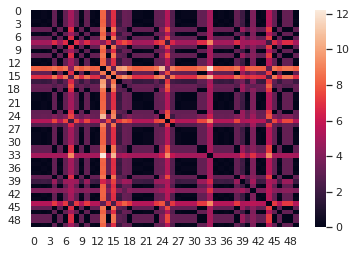

In [31]:
all_diff_matrix = np.array(all_diff).reshape(50,50)
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(all_diff_matrix)

In [33]:
# st.title ("Testing on Iterations")
# st.header("Heatmap for Iteration Differences")
# st.code(sns.heatmap(all_diff_matrix))

In [34]:
assignments = []
for i in range(100):
    assignment_df_i, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "gd"
                             ) 
    assignments.append(assignment_df_i)
assignments

[                          Woman, White Woman, Asian  \
 aidekman                             0            0   
 anderson                      1.783105            0   
 ballou                       15.864498            0   
 capen_house                        1.0            0   
 clic                               1.0            0   
 dental_school                 3.669105            0   
 eaton_hall                         1.0            0   
 fine_arts_house               2.436791            0   
 gifford_house                13.696403            0   
 goddard_chapel                 7.55676            0   
 goddard_hall                  1.783105            0   
 granoff_fam_hillel_center          1.0            0   
 granoff_music_bld             4.083842            0   
 houston_hall                       1.0            0   
 jean_mayer_hnra_center             1.0            0   
 lane_hall                          1.0            0   
 miner_hall                         1.0         

In [37]:
all_diff = []
for i in range(len(assignments)):
    diff_col = []
    for j in range(len(assignments)):
        diff = np.linalg.norm(assignments[i]-assignments[j],1)
        diff_col.append(diff)
        all_diff.append(diff)
print("Mean diff", np.mean(all_diff))
print("Std diff", np.std(all_diff))
print("Avg diff", np.mean(all_diff)/(22*14))

Mean diff 5.036199146706235
Std diff 2.5467262079858792
Avg diff 0.016351295930864398


<AxesSubplot: >

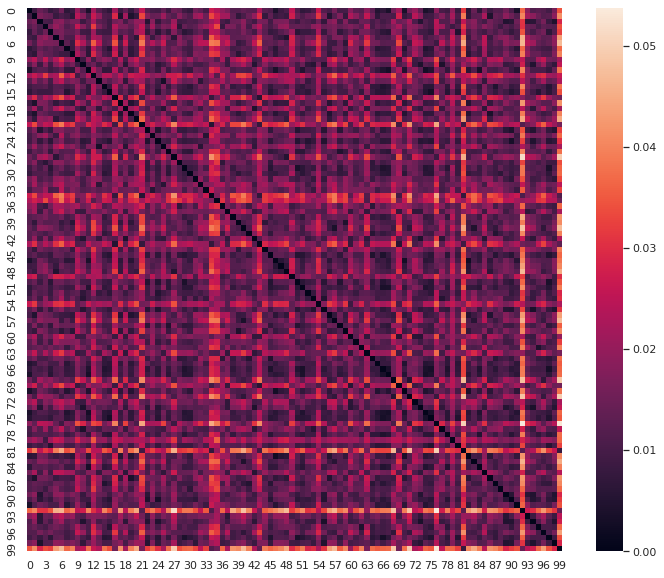

In [38]:
all_diff_matrix = (np.array(all_diff).reshape(100,100))/(22*14)
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(all_diff_matrix)

# Iteration testing with random initiation - Frank Wolfe

In [39]:
assignments_fw = []
for i in range(50):
    assignment_df_i, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = np.random.randint(1,5),
                             iterations = 1000,
                             algo = "fw"
                             ) 
    assignments_fw.append(assignment_df_i)
assignments_fw

[                           Woman, White  Woman, Asian  \
 aidekman                         0.0001           0.0   
 anderson                         1.5529           0.0   
 ballou                          16.7869           0.0   
 capen_house                      0.8889           0.0   
 clic                             0.8423           0.0   
 dental_school                    3.5152           0.0   
 eaton_hall                       0.7910           0.0   
 fine_arts_house                  2.2820           0.0   
 gifford_house                   14.3659           0.0   
 goddard_chapel                   7.7846           0.0   
 goddard_hall                     1.5529           0.0   
 granoff_fam_hillel_center        0.7910           0.0   
 granoff_music_bld                3.7938           0.0   
 houston_hall                     0.8423           0.0   
 jean_mayer_hnra_center           0.8423           0.0   
 lane_hall                        0.7910           0.0   
 miner_hall   

In [40]:
all_diff = []
for i in range(len(assignments_fw)):
    diff_col = []
    for j in range(len(assignments_fw)):
        diff = np.linalg.norm(assignments_fw[i]-assignments_fw[j],1)
        diff_col.append(diff)
        all_diff.append(diff)
print("Mean diff", np.mean(all_diff))
print("Std diff", np.std(all_diff))
print("Avg diff", np.mean(all_diff)/(22*14))

Mean diff 0.6561503200000005
Std diff 0.47456548636821255
Avg diff 0.0021303581818181835


<AxesSubplot: >

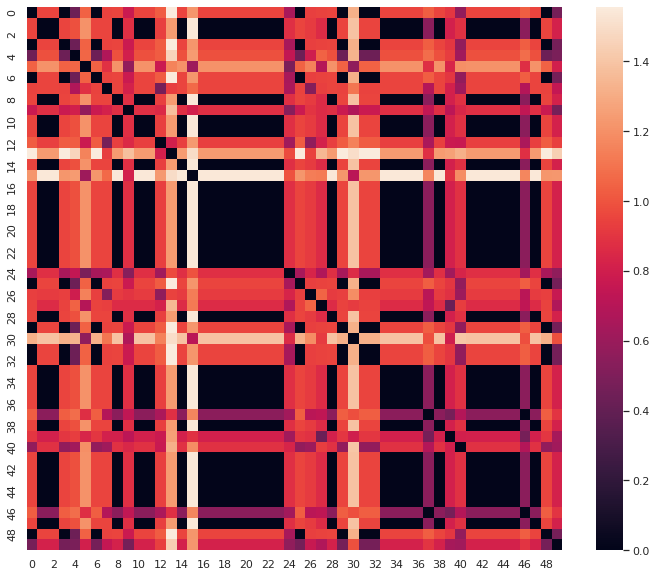

In [41]:
all_diff_matrix = np.array(all_diff).reshape(50,50)
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(all_diff_matrix)

In [42]:
assignments_fw = []
for i in range(50):
    assignment_df_i, run_time = sc.learn_optimal_assignment(
                             hall_df, 
                             student_df,
                             art_df,
                             cost_df, 
                             curator_1,
                             lam = norm_lam_factor*10000, 
                             tau = norm_tau_factor*800,
                             gam = norm_gam_factor4*10000000000000,
                             init = 4,
                             iterations = 1000,
                             algo = "fw"
                             ) 
    assignments_fw.append(assignment_df_i)
assignments_fw

[                           Woman, White  Woman, Asian  \
 aidekman                         0.0000        0.0001   
 anderson                         1.5647        0.0000   
 ballou                          16.8819        0.0000   
 capen_house                      0.9060        0.0000   
 clic                             0.8593        0.0000   
 dental_school                    3.5361        0.0000   
 eaton_hall                       0.8029        0.0000   
 fine_arts_house                  2.2914        0.0000   
 gifford_house                   14.2161        0.0000   
 goddard_chapel                   7.8107        0.0000   
 goddard_hall                     1.5647        0.0000   
 granoff_fam_hillel_center        0.8029        0.0000   
 granoff_music_bld                3.8198        0.0000   
 houston_hall                     0.8593        0.0000   
 jean_mayer_hnra_center           0.8593        0.0000   
 lane_hall                        0.8029        0.0000   
 miner_hall   

In [43]:
all_diff = []
for i in range(len(assignments_fw)):
    diff_col = []
    for j in range(len(assignments_fw)):
        diff = np.linalg.norm(assignments_fw[i]-assignments_fw[j],1)
        diff_col.append(diff)
        all_diff.append(diff)
print("Mean diff", np.mean(all_diff))
print("Std diff", np.std(all_diff))
print("Avg diff", np.mean(all_diff)/(22*14))

Mean diff 0.8418913599999996
Std diff 0.27154465834803354
Avg diff 0.002733413506493505


<AxesSubplot: >

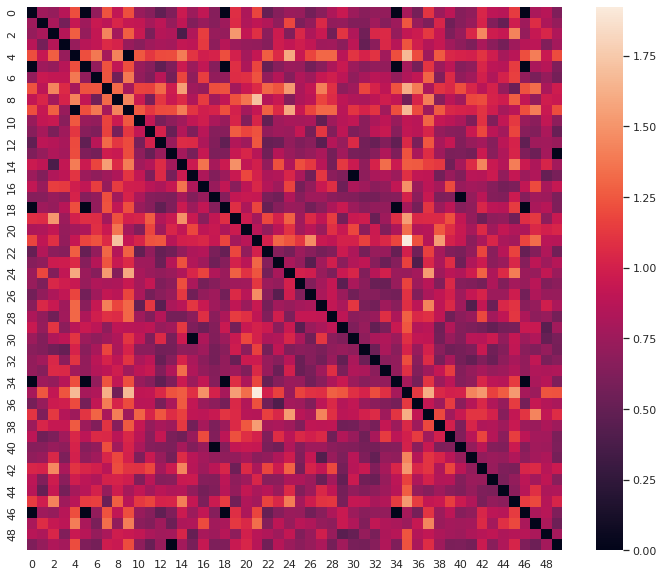

In [44]:
all_diff_matrix = np.array(all_diff).reshape(50,50)
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(all_diff_matrix)

# Create Heatmap Visualization

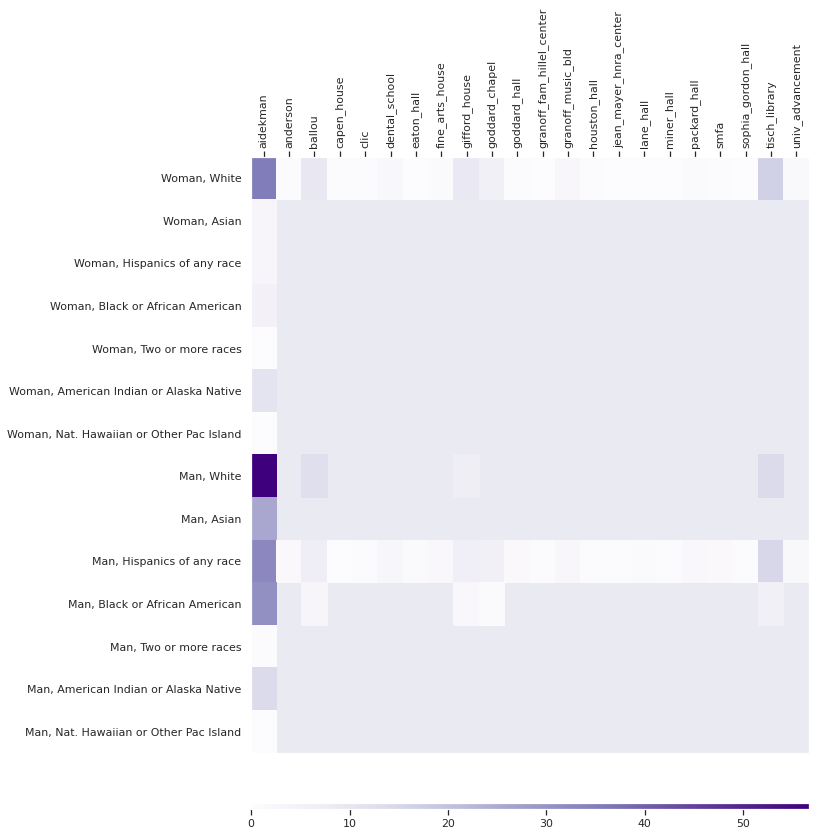

In [45]:
clipped_assignment_df = assignment_df.clip(upper = 1)
sc.assignment_heatmat(assignment_df)

## Validation

In [46]:
sc.baseline_average_value(category = "gender", in_group = "Man")

(12.434127314305787, 2.4366211935925346)

In [47]:
sc.optimized_average_value(assignment_df, category = "gender", in_group = "Man")

(10.253093758743661, 4.052932947013324)

In [48]:
sc.baseline_average_value(category = "race", in_group = "White")

(13.309517368766011, 1.5863256880586507)

In [49]:
sc.optimized_average_value(assignment_df, category = "race", in_group = "White")

(6.558099403772013, 7.682300566665336)

## Make Visualizations

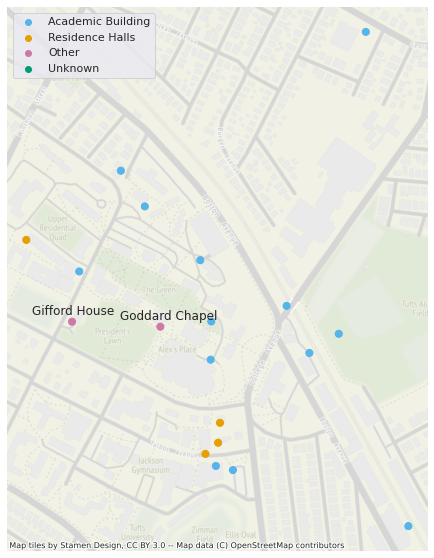

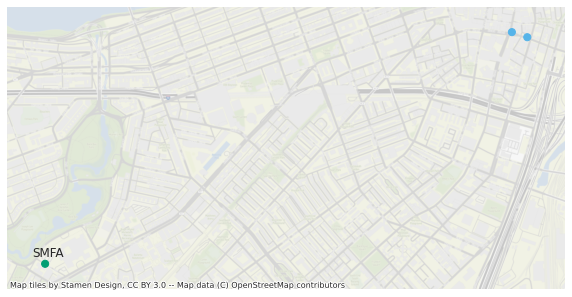

In [50]:
sc.campus_building_map()

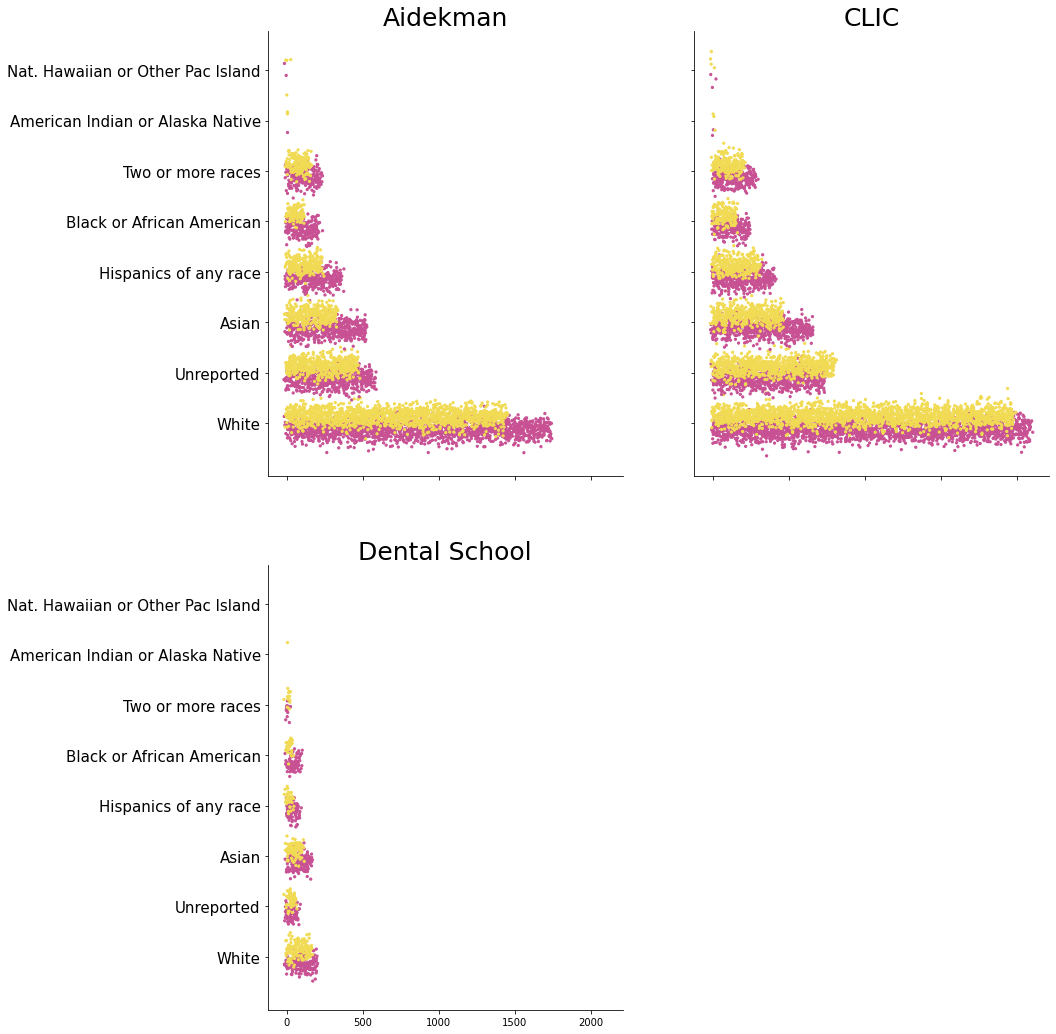

In [2]:
sc.beeswarm_building_gender(demo_cat = "race", building_list = ["Aidekman","CLIC","dental_school"])

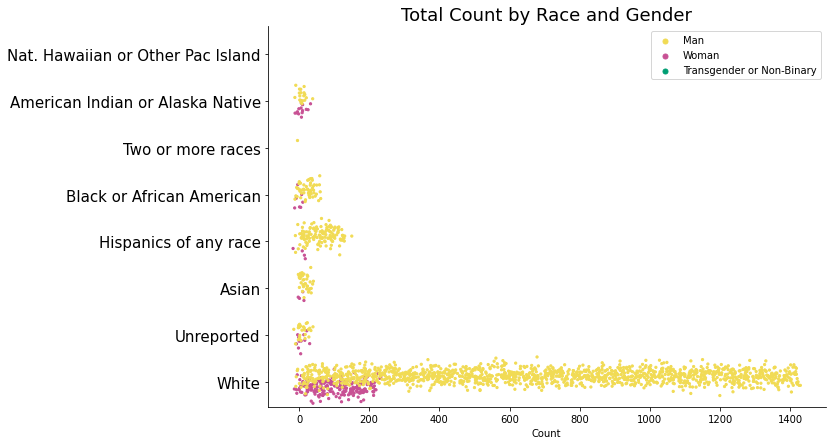

In [3]:
hall_df, student_df, art_df = sc.load_data()
sc.beeswarm_gender(demo_df = art_df, demo_cat = "race", title="Total Count by Race and Gender")

In [13]:
cost_dict = {}
opt_dict = {}
assignment_dict = {}

scaled_lam = [1, 10, 100, 1000, 10000]
scaled_tau = [1, 10, 100, 1000]
scaled_gam = [1, 10, 100, 1000, 10000]

betas = [0.01, 100, 10**8, 10**11, 10**15]

norm_lam_factor, norm_tau_factor, norm_gam_factor = sc.get_normalizing_constants(
                                                hall_df = hall_df,
                                                student_df = student_df,
                                                art_df = art_df,
                                                curator_df = curator_df)

In [16]:
for beta in betas:
    cost_df = sc.compute_cost_matrix(hall_df = hall_df,
                                        student_df = student_df,
                                        art_df = art_df, 
                                        categories = ["gender","race"],
                                        alpha = -1,
                                        beta = beta)

    cost_dict[beta] = cost_df

    df_optimized = pd.DataFrame(columns = ["Man","Non-Man","White","Non-White"])
    for lam in scaled_lam:
        for tau in scaled_tau:
            for gam in scaled_gam:
                assignment_df, run_time  = sc.learn_optimal_assignment(
                                        hall_df = hall_df, 
                                        student_df = student_df,
                                        art_df = art_df,
                                        cost_df = cost_df,
                                        curator_df = curator_df,
                                        lam = norm_lam_factor*lam, 
                                        tau = norm_tau_factor*tau,
                                        gam = norm_gam_factor*gam,
                                        init= 2,
                                        iterations = 1000,
                                        algo = "fw") 

                assignment_dict[f"{beta}_{lam}_{tau}_{gam}"] = assignment_df.values.reshape(1,-1)

                # Get optimized stats.
                os_gender = sc.optimized_average_value(assignment_df.copy(), category = "gender", in_group = "Man")
                os_race = sc.optimized_average_value(assignment_df.copy(), category = "race", in_group = "White")
                df_optimized.loc[f"{beta}_{lam}_{tau}_{gam}",:] = list(os_gender) + list(os_race)

    opt_dict[beta] = df_optimized.copy()

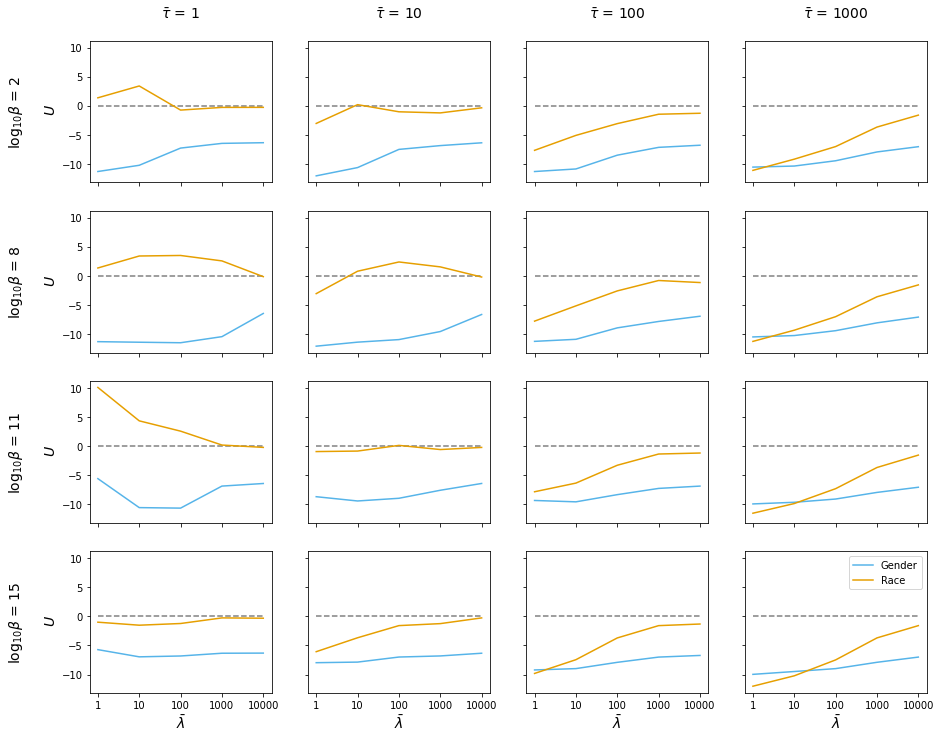

In [25]:
bbetas = [10**2, 10**8, 10**11, 10**15]

cmap = {"Man":sc.COLOR_MAP["light_blue"],
       "Non-Man":sc.COLOR_MAP["dark_blue"],
       "White":sc.COLOR_MAP["light_orange"],
       "Non-White":sc.COLOR_MAP["dark_orange"]}
lmap = {"Man":"--",
       "Non-Man":"-",
       "White":"--",
       "Non-White":"-"}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(bbetas),4,figsize = (15,12), sharex = True, sharey = True)

for i in range(len(bbetas)):
    beta = bbetas[i]
    df_optimized = opt_dict[beta]
    for j in range(len(scaled_tau)):
        tau = scaled_tau[j]
        tau_idx = [d for d in df_optimized.index if float(d.split("_")[2]) == tau]
        tau_idx = [t for t in tau_idx if t.split("_")[-1] == "1"]
        #for c in df_optimized.columns:
        x = df_optimized.loc[tau_idx,"Non-Man"].values - df_optimized.loc[tau_idx,"Man"].values
        ax[i,j].plot(x, color = cmap["Man"], label = "Gender")
        
        x = df_optimized.loc[tau_idx,"Non-White"].values - df_optimized.loc[tau_idx,"White"].values
        ax[i,j].plot(x, color = cmap["White"], label = "Race")
        ax[i, j].set_xticks([i for i in range(len(scaled_lam))])
        ax[i, j].set_xticklabels(scaled_lam)
        ax[i,j].plot(pd.Series(0, index = tau_idx).values, zorder = 0, 
                     linestyle = "--", 
                     color = "grey")

ax[i, j].legend()
for i in range(len(bbetas)):
    ax[i,0].set_ylabel(r"log$_{10}\beta$"+f" = {int(np.log10(bbetas[i]))}\n \n"+r" $U$", fontsize = 14)
for j in range(len(scaled_tau)):
    ax[0, j].set_title(r"$\bar{\tau}$"+f" = {scaled_tau[j]}\n", fontsize = 14)
    ax[-1, j].set_xlabel(r'$\bar{\lambda}$', fontsize = 14)
    
plt.show()